In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np  
from scipy.stats.mstats import normaltest

In [3]:
file_path = r"C:\Users\dipak\OneDrive\Desktop\ml\Machine_Learning\Data_room\boston_housing_clean.pickle"

In [4]:
with open(file_path, 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']

In [5]:
print(type(boston))

<class 'dict'>


In [8]:
boston_data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8.0,307.0,17.4,390.07,4.73,31.5
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4.0,281.0,19.0,395.63,7.22,23.9
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6


In [9]:
data = boston_data

In [10]:
Target = data.MEDV

In [11]:
normaltest(Target)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

<Axes: >

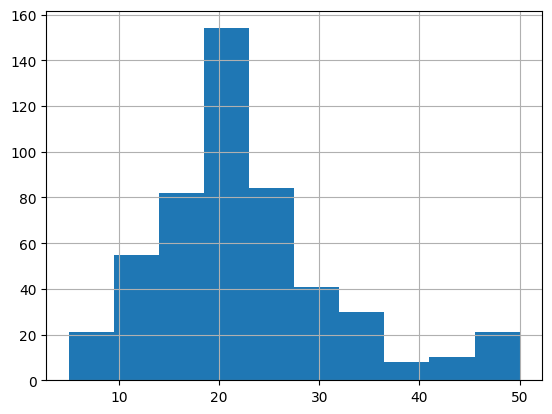

In [12]:
Target.hist()

In [13]:
Target = np.log(Target)

In [14]:
normaltest(Target)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

<Axes: >

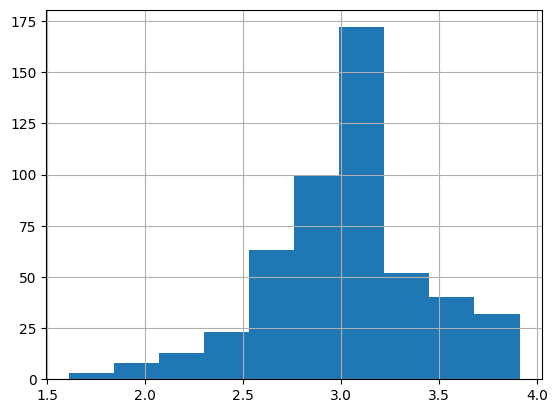

In [15]:
Target.hist()

In [18]:
# For Square root transformation:
Square_Target = data.MEDV 

<Axes: >

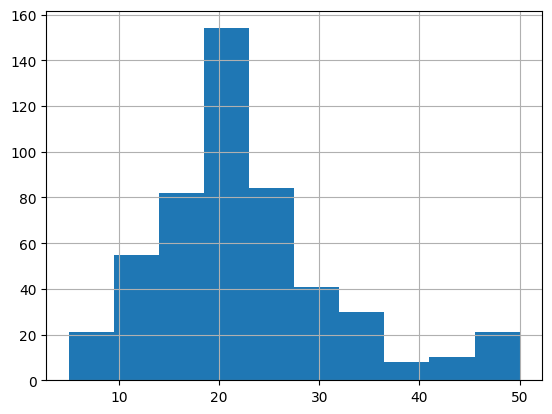

In [19]:
Square_Target.hist()

In [20]:
transformed_to_square = np.sqrt(Square_Target)

<Axes: >

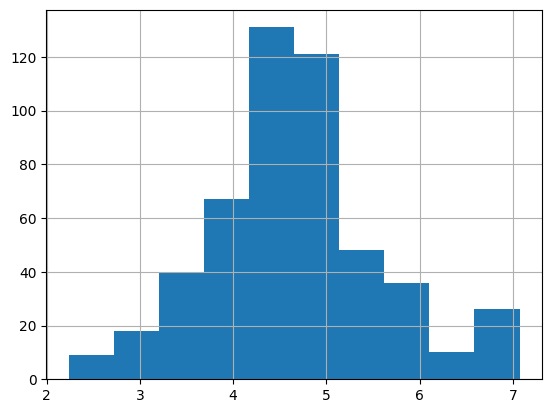

In [21]:
transformed_to_square.hist()

In [22]:
normaltest(transformed_to_square)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

In [25]:
print(0.00018245472768345196 > 3.558645701429252e-05)

True


In [27]:
# We can see that log transformation was better. as with sqrt transformation we have less p-value and far from normal distribution. 

In [28]:
box_cox_target = data.MEDV

<Axes: >

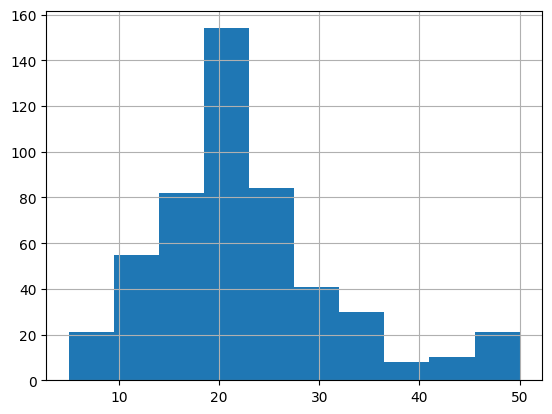

In [30]:
box_cox_target.hist()

In [31]:
from scipy.stats import boxcox

In [32]:
data, lam = boxcox(box_cox_target)

In [38]:
box_cox_transformed = pd.DataFrame(data)

array([[<Axes: title={'center': '0'}>]], dtype=object)

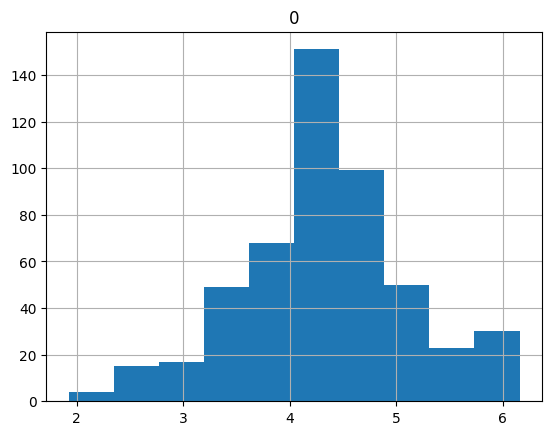

In [39]:
box_cox_transformed.hist()

In [40]:
normaltest(box_cox_transformed)

NormaltestResult(statistic=masked_array(data=[4.513528777459233],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.10468867]))

In [41]:
print(0.10468867 > 0.00018245472768345196)

True


In [42]:
# We can derive that box-cox transformation for normal distribution is best among three. 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


In [45]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [62]:
boston_data.corr(numeric_only=True)["MEDV"].drop("MEDV")

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [63]:
# Since every data features seems to have some positive or negative impact we will take all the features

In [66]:
X = boston_data.drop("MEDV", axis=1)

In [70]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X = pf.fit_transform(X)

In [71]:
y = boston_data["MEDV"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
# Since box-cox had the best transformation for normal distribution
# we choose box-cox transformaion for normal distribution. 

In [74]:
s = StandardScaler()
X_train = s.fit_transform(X_train)

In [82]:
y_train, lam = boxcox(y_train)

In [83]:
y_train.shape

(404,)

In [84]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [88]:
prediction = model.predict(s.fit_transform(X_test))

In [ ]:
from scipy.special import inv_boxcox
prediction = inv_boxcox(prediction, lam)

array([28.45972058, 29.16490758, 16.34823907, 23.54164943, 17.18977518,
       19.6976304 , 17.97768844, 17.27001289, 23.5788279 , 20.6491629 ,
       14.95000009, 22.09272412,  5.19627883, 19.92689133, 19.26513734,
       26.23998008, 18.26073501,  8.58184377, 63.04999501, 13.96097327,
       27.62220054, 30.83524392, 16.03229171, 24.09203262, 16.85875225,
       17.98777789, 20.83255454, 12.28868438, 17.79105922, 20.23805923,
       22.54583395, 26.90168514, 19.60289442, 22.77372359, 15.98928213,
       16.54457427, 34.54530488, 21.71805138, 20.86636495, 24.70364717,
       17.94205876, 35.67779479, 66.20468019, 17.27336743, 27.63186858,
       16.07399938, 16.33857209, 27.11923894, 19.69100804, 28.06457102,
       23.06374937, 38.28178982, 18.99680194, 31.42915128, 51.1110244 ,
       25.28387568, 16.08414723, 39.16431849, 27.09640672, 15.95842506,
       26.00321316, 34.170501  , 30.67676168, 15.1737199 , 31.89665165,
       23.08023131, 15.793904  , 27.63114552, 34.91400493, 11.48

In [89]:
error = r2_score(prediction, y_test)

In [90]:
error

-503.1329233611816